# SPARK CONTEXT Y SQL CONTEXT

In [2]:
import pyspark
sc = pyspark.SparkContext('local[*]')

In [3]:
sc

In [4]:
sqlContext = pyspark.sql.SQLContext(sc)

In [5]:
sqlContext

# CARGA DE DATASETS

In [13]:
df = sqlContext.read.option('header', 'true').option('delimiter', ',').csv('data/Base_evolucion_fondos.csv')

In [14]:
df.head()

Row(COD_USUARIO='E000170', COD_SEGLOBAL=None, fondos_201507='0', fondos_201508='0', fondos_201509='0', fondos_201510='0', fondos_201511='0', fondos_201512='0')

In [15]:
df.printSchema()

root
 |-- COD_USUARIO: string (nullable = true)
 |-- COD_SEGLOBAL: string (nullable = true)
 |-- fondos_201507: string (nullable = true)
 |-- fondos_201508: string (nullable = true)
 |-- fondos_201509: string (nullable = true)
 |-- fondos_201510: string (nullable = true)
 |-- fondos_201511: string (nullable = true)
 |-- fondos_201512: string (nullable = true)



In [19]:
from pyspark.sql.types import DoubleType
fondos_ev = df.withColumn("fondos_201507", df['fondos_201507'].cast(DoubleType()))\
    .withColumn("fondos_201508", df['fondos_201508'].cast(DoubleType()))\
    .withColumn("fondos_201509", df['fondos_201509'].cast(DoubleType()))\
    .withColumn("fondos_201510", df['fondos_201510'].cast(DoubleType()))\
    .withColumn("fondos_201511", df['fondos_201511'].cast(DoubleType()))\
    .withColumn("fondos_201512", df['fondos_201512'].cast(DoubleType()))

In [20]:
fondos_ev.show()

+-----------+------------+-------------+-------------+-------------+-------------+-------------+-------------+
|COD_USUARIO|COD_SEGLOBAL|fondos_201507|fondos_201508|fondos_201509|fondos_201510|fondos_201511|fondos_201512|
+-----------+------------+-------------+-------------+-------------+-------------+-------------+-------------+
|    E000170|        null|          0.0|          0.0|          0.0|          0.0|          0.0|          0.0|
|    E000170|          34|          0.0|          0.0|          0.0|          0.0|          0.0|          0.0|
|    E000170|          35|          0.0|          0.0|          0.0|          0.0|          0.0|          0.0|
|    E000170|          36|          0.0|          0.0|          0.0|          0.0|          0.0|          0.0|
|    E000170|          37|     11684.42|     11673.35|     11675.79|     11687.85|     11696.99|     11687.41|
|    E000170|          42|     67014.43|     65051.89|     63686.01|     65917.87|     43472.36|     23488.17|
|

In [23]:
gestores = sqlContext.read.option('header', 'true').option('delimiter', ',').csv('data/Base_puesto_gestores.csv')

In [24]:
gestores.printSchema()

root
 |-- COD_USUARIO: string (nullable = true)
 |-- tipo_puesto: string (nullable = true)



In [27]:
gestores.show(5)

+-----------+-----------+
|COD_USUARIO|tipo_puesto|
+-----------+-----------+
|    E000170|         GP|
|    E000501|         AF|
|    E000531|         AF|
|    E000545|         AF|
|    E000558|         AF|
+-----------+-----------+
only showing top 5 rows



In [28]:
df = sqlContext.read.option('header', 'true').option('delimiter', ',').csv('data/txc_aport_extr_fondos.csv')

In [29]:
df.printSchema()

root
 |-- cod_ofictrn: string (nullable = true)
 |-- imp_trans: string (nullable = true)
 |-- cod_user: string (nullable = true)
 |-- cod_npuesto: string (nullable = true)
 |-- cod_persona: string (nullable = true)
 |-- hms_soli_trn: string (nullable = true)
 |-- cod_trnfims: string (nullable = true)
 |-- cod_medio_dv: string (nullable = true)
 |-- cod_canal_dv: string (nullable = true)
 |-- cod_serv_dv: string (nullable = true)
 |-- cod_geve_trn: string (nullable = true)
 |-- cod_eve_trn: string (nullable = true)
 |-- cod_deve_trn: string (nullable = true)



In [53]:
extr_fondos = df.withColumn("cod_ofictrn", df['cod_ofictrn'].cast(DoubleType()))\
    .withColumn("imp_trans", df['imp_trans'].cast(DoubleType()))\
    .withColumn("cod_npuesto", df['cod_npuesto'].cast(DoubleType()))\
    .withColumn("cod_persona", df['cod_persona'].cast(DoubleType()))\
    .withColumn("cod_medio_dv", df['cod_medio_dv'].cast(DoubleType()))\
    .withColumn("cod_canal_dv", df['cod_canal_dv'].cast(DoubleType()))\
    .withColumn("cod_serv_dv", df['cod_serv_dv'].cast(DoubleType()))\
    .withColumn("cod_geve_trn", df['cod_geve_trn'].cast(DoubleType()))\
    .withColumn("cod_eve_trn", df['cod_eve_trn'].cast(DoubleType()))\
    .withColumn("cod_deve_trn", df['cod_deve_trn'].cast(DoubleType()))

In [54]:
extr_fondos.show(5)

+-----------+---------+--------+-----------+-----------+--------------------+-----------+------------+------------+-----------+------------+-----------+------------+
|cod_ofictrn|imp_trans|cod_user|cod_npuesto|cod_persona|        hms_soli_trn|cod_trnfims|cod_medio_dv|cod_canal_dv|cod_serv_dv|cod_geve_trn|cod_eve_trn|cod_deve_trn|
+-----------+---------+--------+-----------+-----------+--------------------+-----------+------------+------------+-----------+------------+-----------+------------+
|     1557.0|   5000.0| U044181|        2.0|  5133579.0|2015-12-03 16:47:...|   DSFIT008|         1.0|         1.0|        1.0|         3.0|       37.0|        73.0|
|     2585.0|  13000.0| E018157|        3.0|2.3783944E7|2015-12-23 10:46:...|   DSFIT008|         1.0|         1.0|        1.0|         3.0|       37.0|        73.0|
|     2626.0|  19000.0| UA16687|        1.0|1.2024444E7|2015-12-17 10:25:...|   DSFIT008|         1.0|         1.0|        1.0|         3.0|       37.0|        73.0|
|   

# EJERCICIO 2.1: BORRAR VALORES NAN

In [55]:
extr_fondos.count()

8599

In [56]:
extr_fondos = extr_fondos.na.drop('any')

In [57]:
type(extr_fondos)

pyspark.sql.dataframe.DataFrame

# EJERCICIO 2.2: RENOMBRAR LA COLUMNA cod_user COMO COD_USUARIO

In [58]:
extr_fondos = extr_fondos.withColumnRenamed('cod_user', 'COD_USUARIO')

In [60]:
extr_fondos.show()

+-----------+---------+-----------+-----------+-----------+--------------------+-----------+------------+------------+-----------+------------+-----------+------------+
|cod_ofictrn|imp_trans|COD_USUARIO|cod_npuesto|cod_persona|        hms_soli_trn|cod_trnfims|cod_medio_dv|cod_canal_dv|cod_serv_dv|cod_geve_trn|cod_eve_trn|cod_deve_trn|
+-----------+---------+-----------+-----------+-----------+--------------------+-----------+------------+------------+-----------+------------+-----------+------------+
|     1557.0|   5000.0|    U044181|        2.0|  5133579.0|2015-12-03 16:47:...|   DSFIT008|         1.0|         1.0|        1.0|         3.0|       37.0|        73.0|
|     2585.0|  13000.0|    E018157|        3.0|2.3783944E7|2015-12-23 10:46:...|   DSFIT008|         1.0|         1.0|        1.0|         3.0|       37.0|        73.0|
|     2626.0|  19000.0|    UA16687|        1.0|1.2024444E7|2015-12-17 10:25:...|   DSFIT008|         1.0|         1.0|        1.0|         3.0|       37.0|

# EJERCICIO 3.1: ¿CUANTOS GESTORES TIENEN EL TIPO DE PUESTO 'AF'?

In [64]:
gestores.filter(gestores.tipo_puesto == 'AF').count()

728

# EJERCICIO 3.2: MUESTRA LAS ULTIMAS DOS APORTACIONES DEL USUARIO UA16687

In [67]:
extr_fondos.filter(extr_fondos.COD_USUARIO == 'UA16687').sort('hms_soli_trn',ascending=False).toPandas().head(2)

,cod_ofictrn,imp_trans,COD_USUARIO,cod_npuesto,cod_persona,hms_soli_trn,cod_trnfims,cod_medio_dv,cod_canal_dv,cod_serv_dv,cod_geve_trn,cod_eve_trn,cod_deve_trn
0,2626.0,19000.0,UA16687,1.0,12024444.0,2015-12-17 10:25:51.0,DSFIT008,1.0,1.0,1.0,3.0,37.0,73.0
1,2626.0,10000.0,UA16687,1.0,1616852.0,2015-11-24 14:36:16.0,DSFIT008,1.0,1.0,1.0,3.0,37.0,73.0


# EJERCICIO 3.3: CUENTA LOS USUARIOS CUYO COD_USUARIO COMIENZA POR 'UA'

In [73]:
gestores.filter(gestores.COD_USUARIO.startswith('UA')).count()

133

# EJERCICIO 4: TOTAL DE GESTORES POR PUESTO

In [77]:
gestores.groupBy('tipo_puesto').count().show()

+-----------+-----+
|tipo_puesto|count|
+-----------+-----+
|        APR|    3|
|         DC|  268|
|        AFR|   25|
|        DGR|   52|
|       DCBC|  347|
|        DO3|  638|
|         GD|  176|
|         DO|    1|
|         GP|  424|
|        DO2| 1062|
|         AP|  228|
|         AF|  728|
+-----------+-----+



# EJERCICIO 5.1: INCLUIR LA DESCRIPCION DEL PUESTO DE TRABAJO EN LA TABLA DE GESTORES (a partir del archivo tabla_puestos.csv)

In [81]:
tipo_puesto = sqlContext.read.option('header', 'true').option('delimiter', ':').csv('data/tabla_puestos.csv')

In [82]:
tipo_puesto.show()

+-----------+--------------------+
|tipo_puesto|     tipo_puesto_def|
+-----------+--------------------+
|         GP|        Gestor_pymes|
|         AF|   Asesor_Financiero|
|         GD|      Gestor_Directo|
|        AFR|Asesor_Financiero...|
|        DO3|Asesor_Financiero...|
|         DC|  Director_Comercial|
|         AP|  Asesor_Patrimonial|
|        DO3|Asesor_Financiero...|
|        DGR|Director_General_...|
|       DCBC|     Director_de_CBC|
|         DO|     Drector_Oficina|
|        APR|Asesor_Financiero...|
+-----------+--------------------+



In [83]:
gestores = gestores.join(tipo_puesto, 'tipo_puesto')

In [84]:
gestores.show()

+-----------+-----------+--------------------+
|tipo_puesto|COD_USUARIO|     tipo_puesto_def|
+-----------+-----------+--------------------+
|         GP|    E000170|        Gestor_pymes|
|         AF|    E000501|   Asesor_Financiero|
|         AF|    E000531|   Asesor_Financiero|
|         AF|    E000545|   Asesor_Financiero|
|         AF|    E000558|   Asesor_Financiero|
|         AF|    E000575|   Asesor_Financiero|
|         AF|    E000766|   Asesor_Financiero|
|         GP|    E000839|        Gestor_pymes|
|         AF|    E001223|   Asesor_Financiero|
|         AF|    E017652|   Asesor_Financiero|
|         GD|    E017834|      Gestor_Directo|
|         AF|    E017873|   Asesor_Financiero|
|         GD|    E017941|      Gestor_Directo|
|         GP|    E018089|        Gestor_pymes|
|        AFR|    E018296|Asesor_Financiero...|
|         GP|    E018300|        Gestor_pymes|
|         AF|    E018439|   Asesor_Financiero|
|        DO3|    E018543|Asesor_Financiero...|
|        DO3|

# EJERCICIO 5.2: AÑADIR UNA COLUMNA CON EL TOTAL DE PERSONAS POR PUESTO 

In [87]:
total_puesto = gestores.groupBy('tipo_puesto').count()

In [88]:
total_puesto.show()

+-----------+-----+
|tipo_puesto|count|
+-----------+-----+
|        APR|    3|
|         DC|  268|
|        AFR|   25|
|        DGR|   52|
|       DCBC|  347|
|        DO3| 1276|
|         GD|  176|
|         DO|    1|
|         GP|  424|
|         AP|  228|
|         AF|  728|
+-----------+-----+



In [90]:
gestores = gestores.join(total_puesto, 'tipo_puesto')

In [91]:
gestores.show()

+-----------+-----------+--------------------+-----+
|tipo_puesto|COD_USUARIO|     tipo_puesto_def|count|
+-----------+-----------+--------------------+-----+
|         GP|    E000170|        Gestor_pymes|  424|
|         AF|    E000501|   Asesor_Financiero|  728|
|         AF|    E000531|   Asesor_Financiero|  728|
|         AF|    E000545|   Asesor_Financiero|  728|
|         AF|    E000558|   Asesor_Financiero|  728|
|         AF|    E000575|   Asesor_Financiero|  728|
|         AF|    E000766|   Asesor_Financiero|  728|
|         GP|    E000839|        Gestor_pymes|  424|
|         AF|    E001223|   Asesor_Financiero|  728|
|         AF|    E017652|   Asesor_Financiero|  728|
|         GD|    E017834|      Gestor_Directo|  176|
|         AF|    E017873|   Asesor_Financiero|  728|
|         GD|    E017941|      Gestor_Directo|  176|
|         GP|    E018089|        Gestor_pymes|  424|
|        AFR|    E018296|Asesor_Financiero...|   25|
|         GP|    E018300|        Gestor_pymes|

# EJERCICIO 5.3: CAMBIAR EL NOMBRE DE LA COLUMNA DEL TOTAL A "total_por_puesto"

In [92]:
gestores = gestores.withColumnRenamed('count','total_por_puesto')

In [93]:
gestores.show()

+-----------+-----------+--------------------+----------------+
|tipo_puesto|COD_USUARIO|     tipo_puesto_def|total_por_puesto|
+-----------+-----------+--------------------+----------------+
|         GP|    E000170|        Gestor_pymes|             424|
|         AF|    E000501|   Asesor_Financiero|             728|
|         AF|    E000531|   Asesor_Financiero|             728|
|         AF|    E000545|   Asesor_Financiero|             728|
|         AF|    E000558|   Asesor_Financiero|             728|
|         AF|    E000575|   Asesor_Financiero|             728|
|         AF|    E000766|   Asesor_Financiero|             728|
|         GP|    E000839|        Gestor_pymes|             424|
|         AF|    E001223|   Asesor_Financiero|             728|
|         AF|    E017652|   Asesor_Financiero|             728|
|         GD|    E017834|      Gestor_Directo|             176|
|         AF|    E017873|   Asesor_Financiero|             728|
|         GD|    E017941|      Gestor_Di

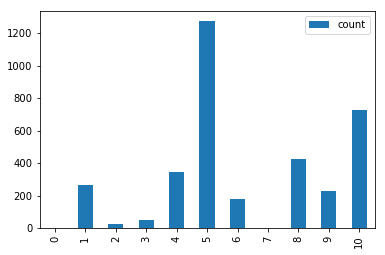

In [107]:
total_puesto.toPandas().plot(kind='bar')

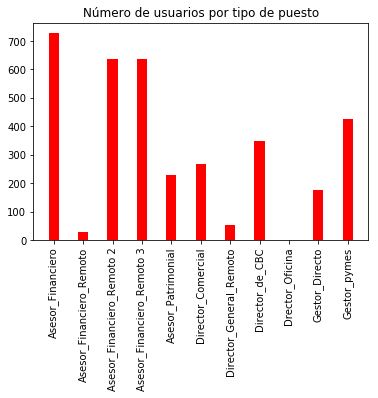

In [109]:

df = gestores.toPandas().groupby(["tipo_puesto_def"]).size().reset_index(name='Usuarios')
N = len(df)
ind = np.arange(N) # the x locations for the groups
width = 0.35       # the width of the bars: can also be len(x) sequence
p1 = plt.bar(ind, df.Usuarios, width, color='r')
plt.xticks(ind, df.tipo_puesto_def,rotation=90)
plt.title('Número de usuarios por tipo de puesto')
plt.show()

# EJERCICIO 5: Top 10 de gestores, para un conjunto del segmento global, que tengan mayor cantidad de importe en fondos para el segmento global = 41

In [122]:
fondos_agrup = fondos_ev.filter(fondos_ev.COD_SEGLOBAL == '41').groupBy(['COD_SEGLOBAL','COD_USUARIO']).sum()
fondos_agrup.show()

+------------+-----------+------------------+------------------+------------------+------------------+------------------+------------------+
|COD_SEGLOBAL|COD_USUARIO|sum(fondos_201507)|sum(fondos_201508)|sum(fondos_201509)|sum(fondos_201510)|sum(fondos_201511)|sum(fondos_201512)|
+------------+-----------+------------------+------------------+------------------+------------------+------------------+------------------+
|          41|    U075117|               0.0|               0.0|               0.0|               0.0|               0.0|               0.0|
|          41|    U077336|               0.0|               0.0|               0.0|               0.0|               0.0|               0.0|
|          41|    U078126|          25198.16|          24578.65|          24428.27|          25053.52|           25952.0|          25116.59|
|          41|    U091109|         434028.32|         399521.37|          379071.4|         415268.72|         422369.22|         407438.26|
|          41

In [125]:
fondos_agrup = fondos_agrup.withColumnRenamed('sum(fondos_201507)','fondos_201507')\
                        .withColumnRenamed('sum(fondos_201508)','fondos_201508')\
                        .withColumnRenamed('sum(fondos_201509)','fondos_201509')\
                        .withColumnRenamed('sum(fondos_201510)','fondos_201510')\
                        .withColumnRenamed('sum(fondos_201511)','fondos_201511')\
                        .withColumnRenamed('sum(fondos_201512)','fondos_201512')

In [126]:
fondos_agrup.printSchema()

root
 |-- COD_SEGLOBAL: string (nullable = true)
 |-- COD_USUARIO: string (nullable = true)
 |-- fondos_201507: double (nullable = true)
 |-- fondos_201508: double (nullable = true)
 |-- fondos_201509: double (nullable = true)
 |-- fondos_201510: double (nullable = true)
 |-- fondos_201511: double (nullable = true)
 |-- fondos_201512: double (nullable = true)



In [127]:
fondos_agrup = fondos_agrup.withColumn('TOTAL', fondos_agrup.fondos_201507+fondos_agrup.fondos_201508+\
                                       fondos_agrup.fondos_201509+fondos_agrup.fondos_201510+\
                                       fondos_agrup.fondos_201511+fondos_agrup.fondos_201512)

In [131]:
fondos_agrup.sort('TOTAL',ascending=False).show(10)

+------------+-----------+-------------+-------------+-------------+-------------+-------------+-------------+--------------------+
|COD_SEGLOBAL|COD_USUARIO|fondos_201507|fondos_201508|fondos_201509|fondos_201510|fondos_201511|fondos_201512|               TOTAL|
+------------+-----------+-------------+-------------+-------------+-------------+-------------+-------------+--------------------+
|          41|    U074939|5.061299048E7|5.008202812E7| 4.96176457E7|4.980997095E7|4.817754114E7|4.596494926E7|      2.9426512565E8|
|          41|    U098194|3.613579924E7|3.648182101E7|3.555722628E7|3.611930492E7|3.608320397E7|3.560132124E7|      2.1597867666E8|
|          41|    U216094|2.422396166E7|2.357620817E7|2.367436165E7|2.357557466E7|2.354551651E7|2.213363075E7|1.4072925339999998E8|
|          41|    U075773|2.024342059E7| 2.03429777E7|1.945409504E7|2.116180227E7| 2.11596283E7|2.003409646E7|1.2239602035999998E8|
|          41|    U076208|2.047509094E7|2.015505726E7|1.944810827E7|2.048252

# EJERCICIO 6: Top 10 de gestores, para un conjunto del segmento global, que tengan una mayor evolución en saldo en fondos con cod_seglobal= 41

In [132]:
fondos_agrup = fondos_ev.filter(fondos_ev.COD_SEGLOBAL == '41').groupBy(['COD_SEGLOBAL','COD_USUARIO']).sum()

In [133]:
fondos_agrup = fondos_agrup.withColumnRenamed('sum(fondos_201507)','fondos_201507')\
                        .withColumnRenamed('sum(fondos_201508)','fondos_201508')\
                        .withColumnRenamed('sum(fondos_201509)','fondos_201509')\
                        .withColumnRenamed('sum(fondos_201510)','fondos_201510')\
                        .withColumnRenamed('sum(fondos_201511)','fondos_201511')\
                        .withColumnRenamed('sum(fondos_201512)','fondos_201512')

In [134]:
fondos_agrup = fondos_agrup.withColumn('EVOLUCION', (fondos_agrup.fondos_201512-fondos_agrup.fondos_201507)/\
                                       fondos_agrup.fondos_201507)

In [137]:
fondos_agrup.sort('EVOLUCION',ascending=False).show(10)

+------------+-----------+-------------+-------------+-------------+-------------+-------------+-------------+------------------+
|COD_SEGLOBAL|COD_USUARIO|fondos_201507|fondos_201508|fondos_201509|fondos_201510|fondos_201511|fondos_201512|         EVOLUCION|
+------------+-----------+-------------+-------------+-------------+-------------+-------------+-------------+------------------+
|          41|    U084596|   2424728.26|   5588454.14|    5562729.2|   5416636.25|   5460054.69|   5452460.95|1.2486894881985664|
|          41|    U089555|     47456.73|     96917.89|     96584.43|     97860.65|     99678.18|     99471.11|1.0960380118899888|
|          41|    U095050|     13825.25|      8821.77|     38822.07|     38819.25|     38822.95|     28797.98|1.0829988607800944|
|          41|    U096059|     97983.98|     97375.14|    196107.13|    197690.33|    198336.65|    197354.33|1.0141489455725312|
|          41|    UA70869|    398107.25|    485770.82|    474038.66|    486644.14|    5634

# EJERCICIO 7 : Cuales son los 3 tipos de puesto que manejan mayor cantidad de fondos en media por mes

In [140]:
fondos_agrup = fondos_ev.drop('COD_SEGLOBAL').groupBy(['COD_USUARIO']).sum()


In [150]:
fondos_ev_gest = fondos_ev.join(gestores, 'COD_USUARIO')
a = fondos_ev_gest.groupBy('tipo_puesto').mean().toPandas()

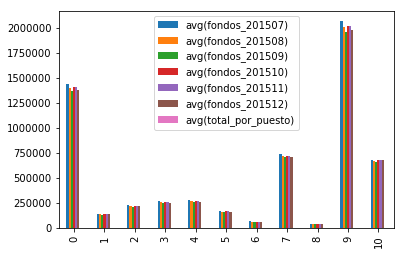

In [151]:
a.plot(kind = 'bar')